In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)


df = pd.read_csv("/content/Netflix Dataset.csv")

In [15]:
df

Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7784        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7785        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7786            Unknown                                            Nasty C   
7787            Unknown                         Adriano Zumbo, Rachel Khoo   
7788           Sam Dunn                                            Unknown   

                                                Country Release_Date Rating  \
0                                                Brazil   2020-08-14  TV-MA   
1                                                Mexico   2016-12-23  TV-MA   
2                                             Singapore   2018-12-20      R   
3                                         United States   2017-11-16  PG-13   
4                                         United States   2020-01-01  PG-13   
...                                                 ...          ...    ...   
7784  Sweden, Czech Republic, United Kingdom, Denmar...   2020-10-19  TV-MA   
7785                                              India   2019-03-02  TV-14   
7786                                            Unknown   2020-09-25  TV-MA   
7787                                          Australia   2020-10-31  TV-PG   
7788              United Kingdom, Canada, United States   2020-03-01  TV-MA   

       Duration                                               Type  \
0     4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
1        93 min                       Dramas, International Movies   
2        78 min                Horror Movies, International Movies   
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
4       123 min                                             Dramas   
...         ...                                                ...   
7784     99 min                       Dramas, International Movies   
7785    111 min     Dramas, International Movies, Music & Musicals   
7786     44 min  Documentaries, International Movies, Music & M...   
7787   1 Season                 International TV Shows, Reality TV   
7788     90 min                    Documentaries, Music & Musicals   

                                            Description    Year  \
0     In a future where the elite inhabit an island ...  2020.0   
1     After a devastating earthquake hits Mexico Cit...  2016.0   
2     When an army recruit is found dead, his fellow...  2018.0   
3     In a postapocalyptic world, rag-doll robots hi...  2017.0   
4     A brilliant group of students become card-coun...  2020.0   
...                                                 ...     ...   
7784  When Leban

In [3]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [4]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Year'] = df['Release_Date'].dt.year

df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")


In [5]:
print("\nCategory Distribution:\n", df['Category'].value_counts())



Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


In [6]:
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))



Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


In [7]:
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())



Dataset covers years from 2008.0 to 2021.0


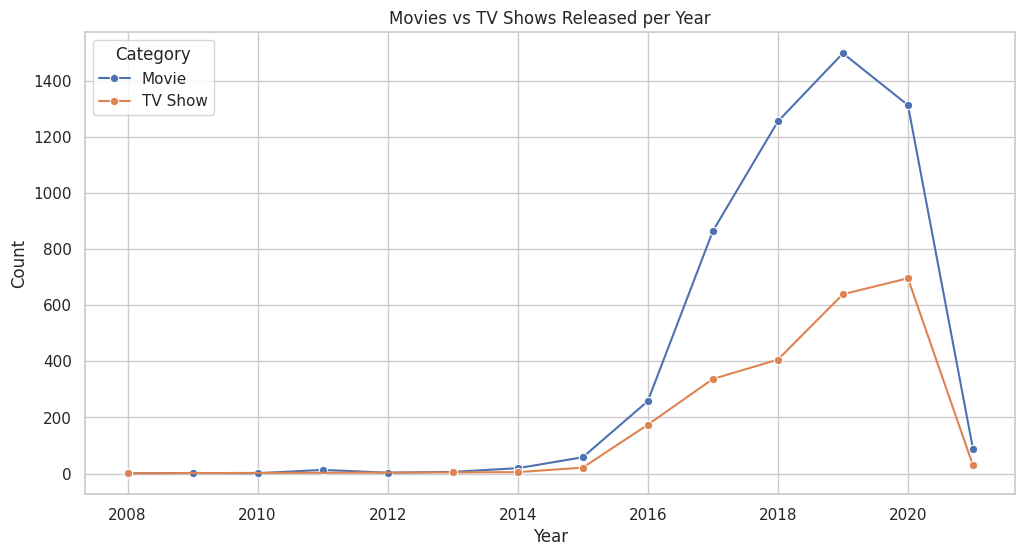

In [8]:
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4170323282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


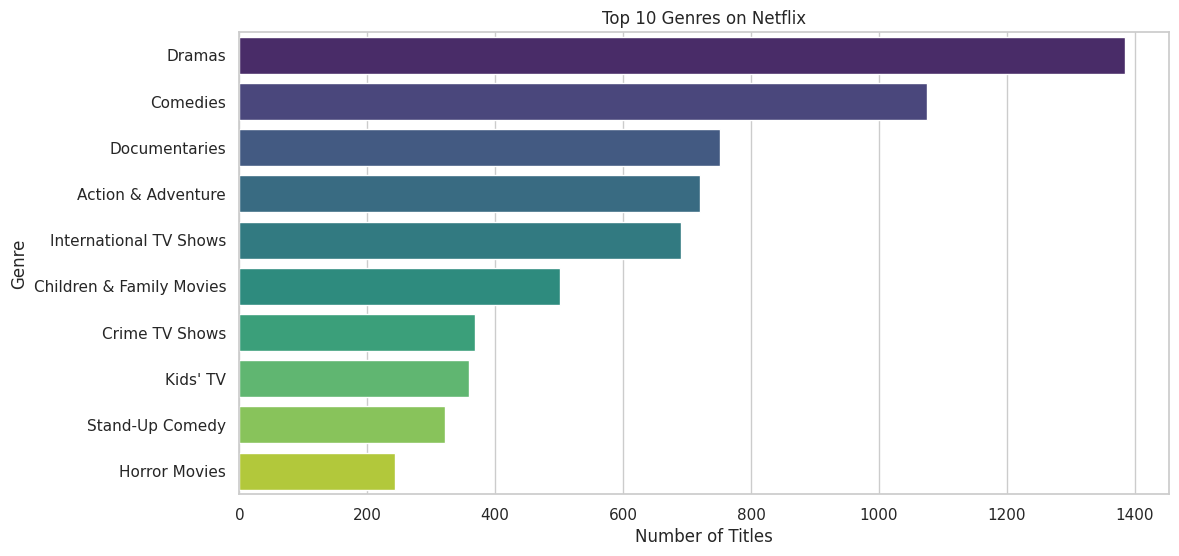

In [9]:
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

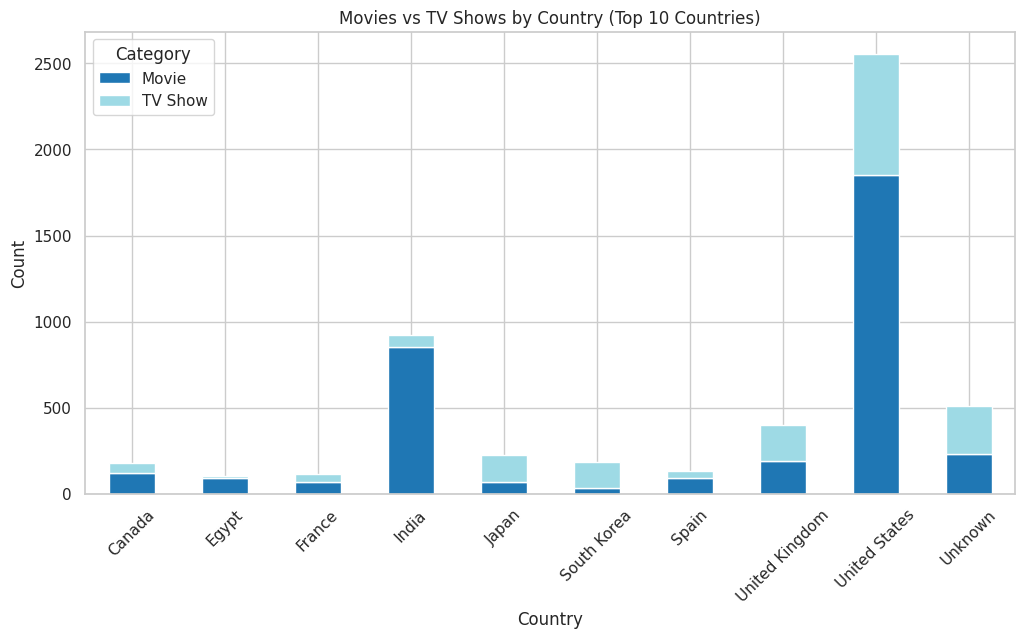

In [10]:
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [11]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()


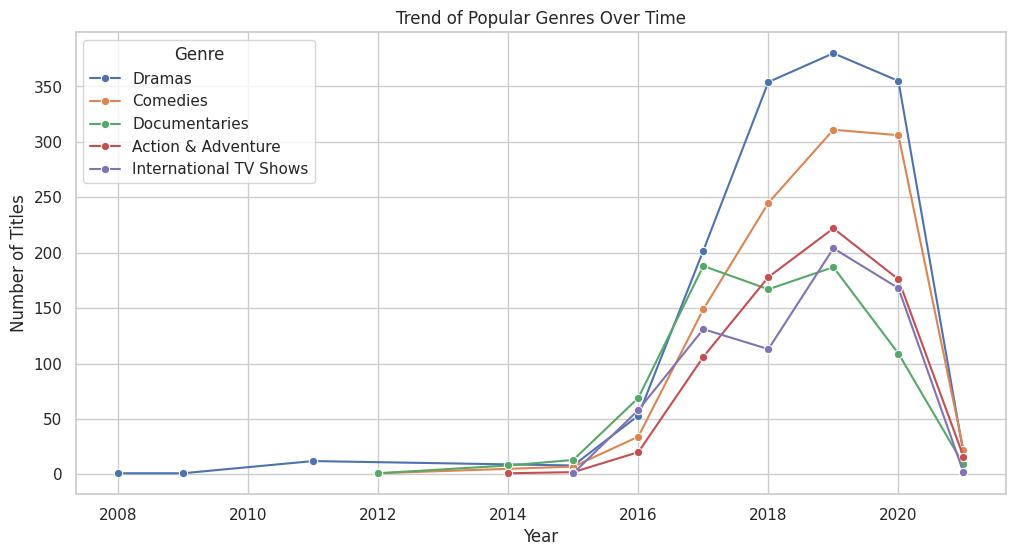

In [12]:
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')

sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()


/tmp/ipython-input-3114063369.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



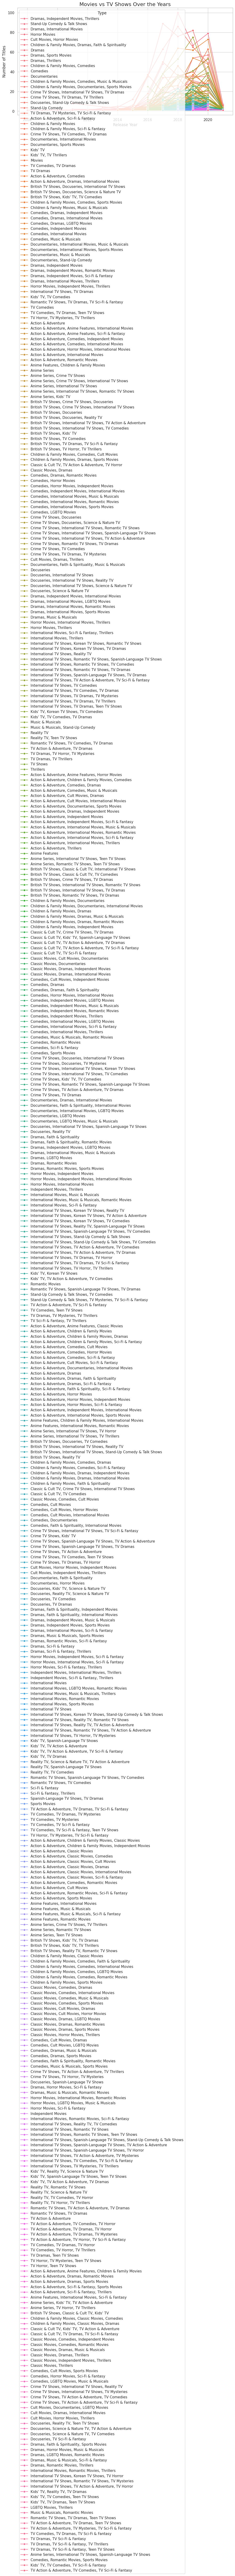

In [14]:
plt.figure(figsize=(12,6))
type_year = df.groupby(["Year", "Type"]).size().reset_index(name="count")
sns.lineplot(data=type_year, x="Year", y="count", hue="Type", marker="o")
plt.title("Movies vs TV Shows Over the Years", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.tight_layout()
plt.show()